In [1]:
import sys
import os
import pandas as pd

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

from src.data_loader import load_data, preprocess_data, data_visualization
from src.feature_engineering import create_features
from src.model import train_model, predict
from src.evaluation import evaluate_model, visualize_prediction
from src.backtest import backtest
from src.candlestick_chart import plot_candlestick_chart

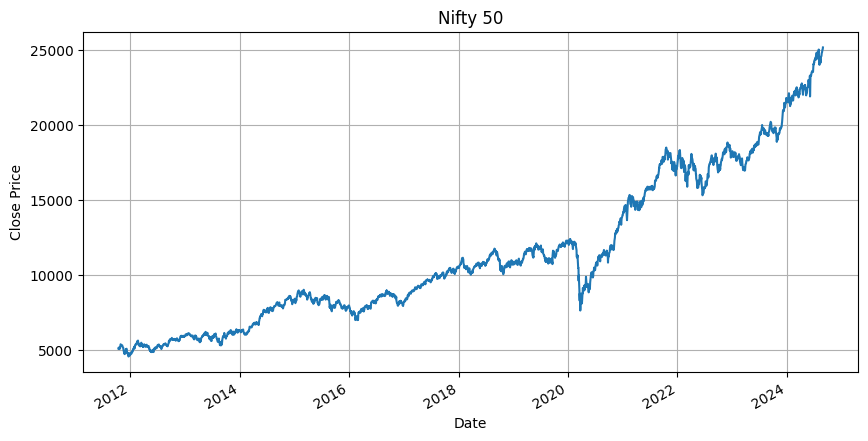

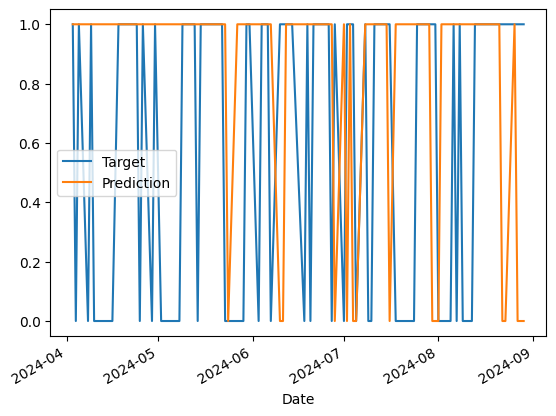

In [2]:
# Load and preprocess the data
nifty50 = load_data('^NSEI')
nifty50 = preprocess_data(nifty50)

# Create features
horizons = [2, 5, 60, 250, 1000]
nifty50, new_predictors = create_features(nifty50, horizons)

# Split the data into training and testing sets
train = nifty50.iloc[:-100]
test = nifty50.iloc[-100:]

# Train the model
model = train_model(train, new_predictors)

# Make predictions
preds = predict(model, test, new_predictors)

# Evaluate the model
precision = evaluate_model(test, preds)

# Visualize the historical data
data_visualization(nifty50)

# Plot the candlestick chart
plot_candlestick_chart(nifty50)

# Visualize the predictions
visualize_prediction(test, preds)

# Backtest the model
backtest_results = backtest(nifty50, model, new_predictors)